In [1]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *
from scatter_toolbox import * 

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


# Area-weighted and Area percentile

# Worker Qualities 

In [36]:
Qj=pkl.load(open("Qj_area.pkl",'r'))
worker_obj_tbl = Qj
Athres_lst = [90,95,99]
for Athres in Athres_lst:
    Qj12=pkl.load(open("Qgt12_A>{}%.pkl".format(Athres),'r'))
    Qj12=Qj12.rename(columns = {'Qp1':'Qp1[A>{}%]'.format(Athres),'Qp2':'Qp2[A<{}%]'.format(Athres),\
                                'Qn1':'Qn1[A>{}%]'.format(Athres),'Qn2':'Qn2[A<{}%]'.format(Athres)})
    worker_obj_tbl =worker_obj_tbl.merge(Qj12)
df_old = pd.read_csv("worker_obj_qualities.csv")
df = worker_obj_tbl.merge(df_old,on=["object_id","worker_id"])

In [38]:
df.to_csv("worker_obj_qualities_all.csv",index=None)

In [39]:
df = pd.read_csv("worker_obj_qualities_all.csv")
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

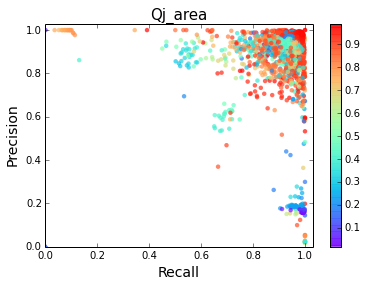

In [40]:
scatterplot(df,"Recall","Precision","Qj_area",bucketize=False)

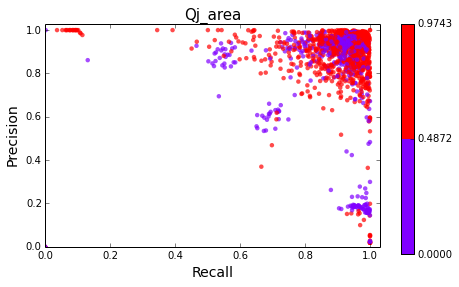

In [41]:
z_attr="Qj_area"
bucketized_data = bucketize(df[z_attr],2)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

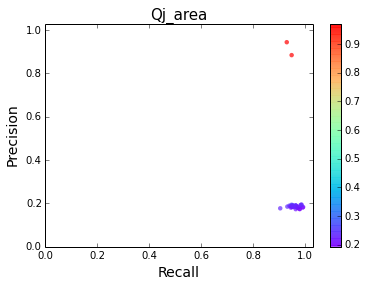

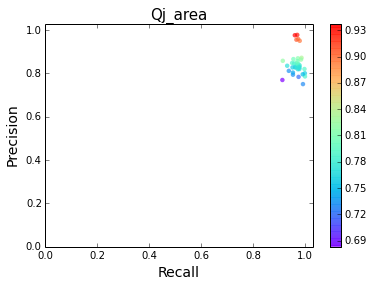

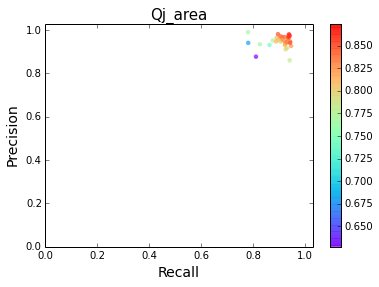

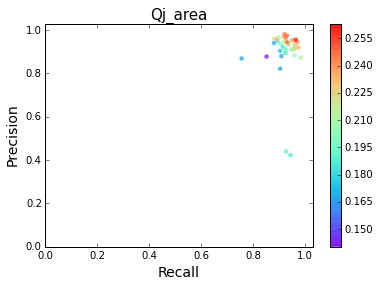

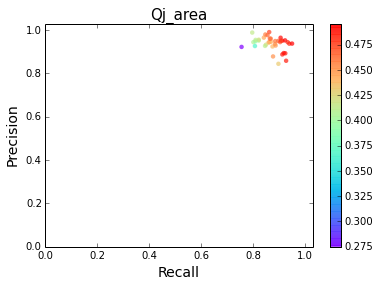

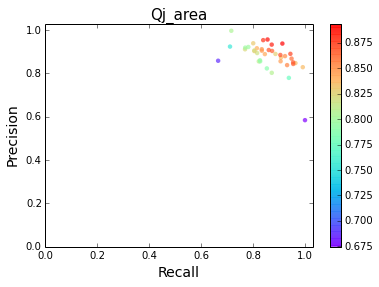

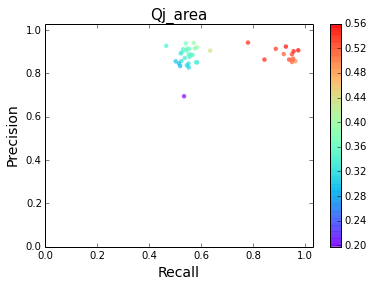

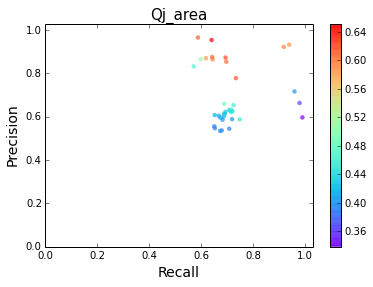

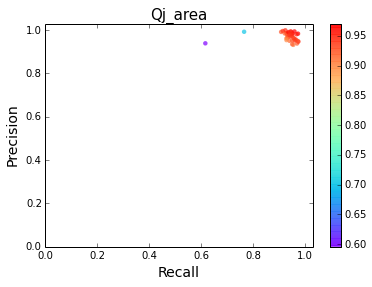

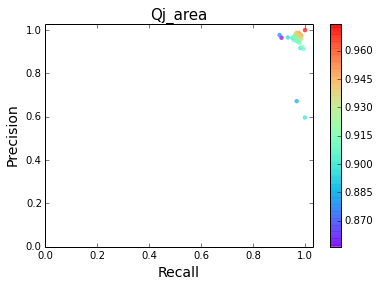

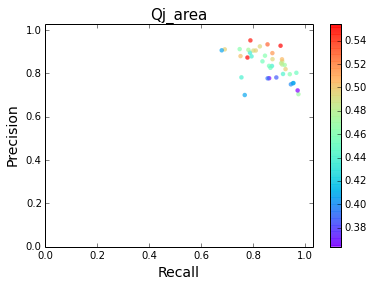

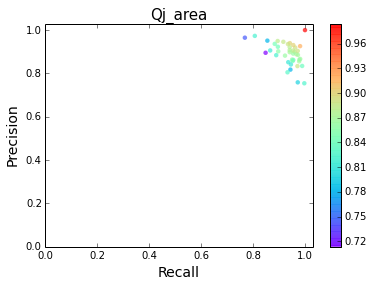

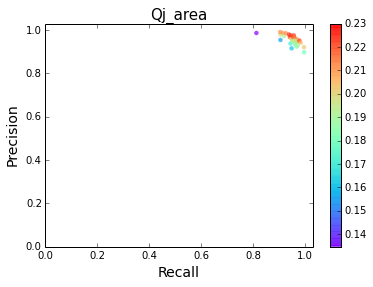

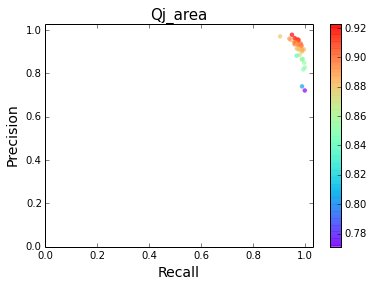

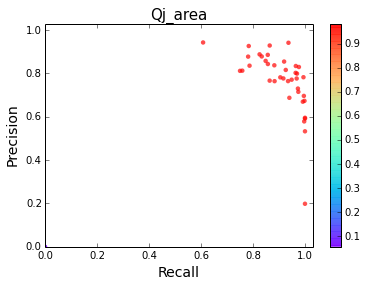

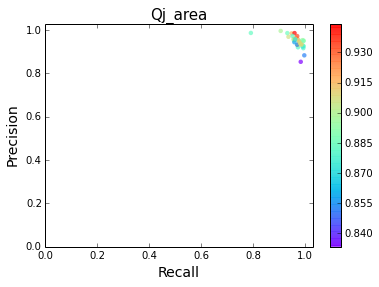

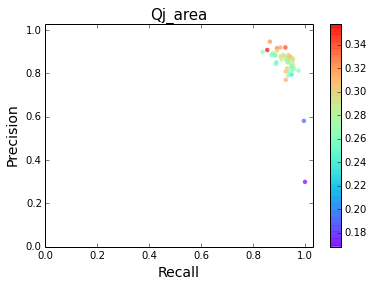

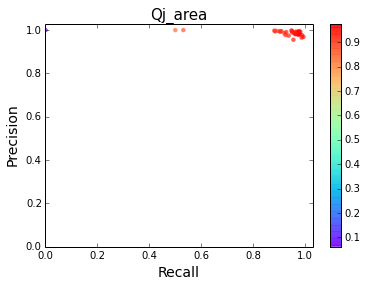

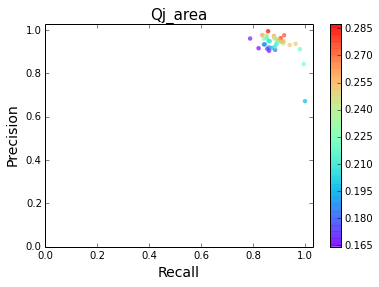

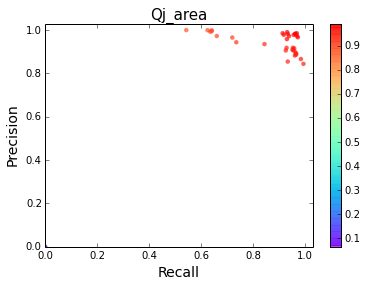

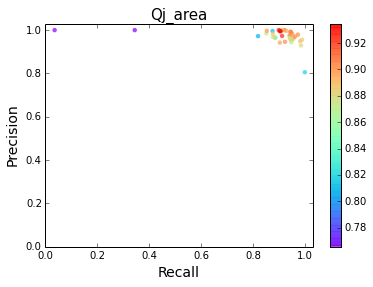

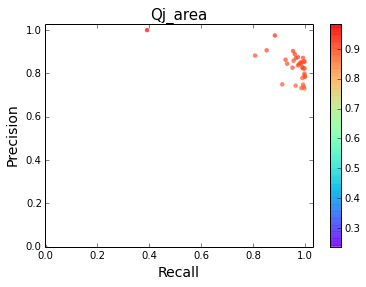

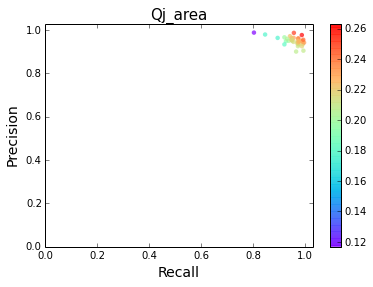

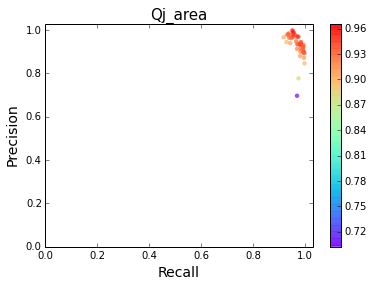

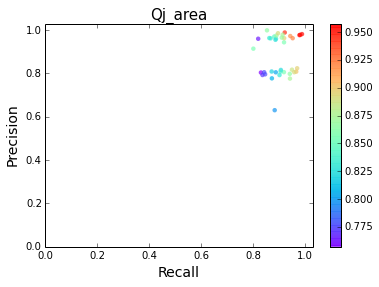

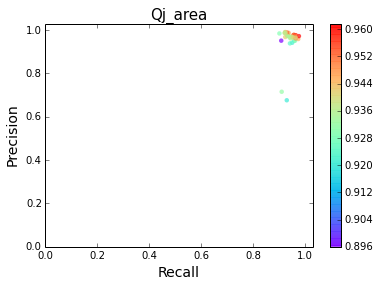

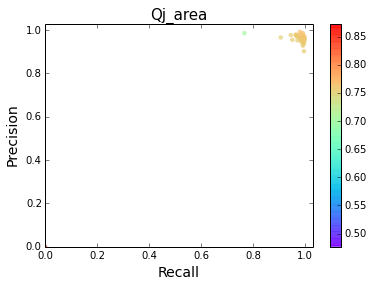

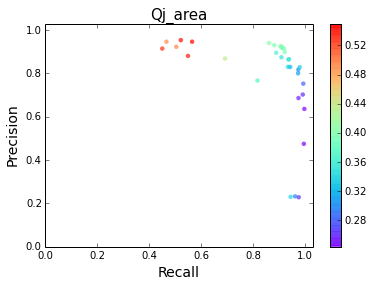

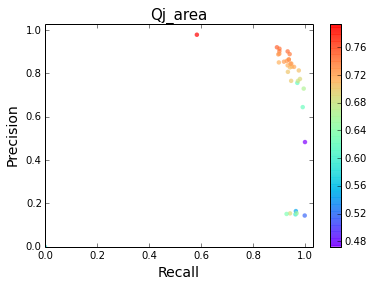

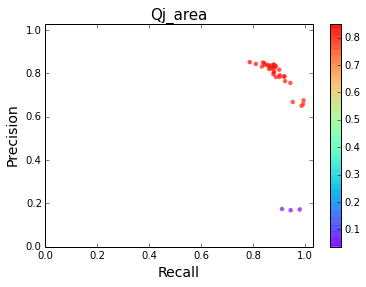

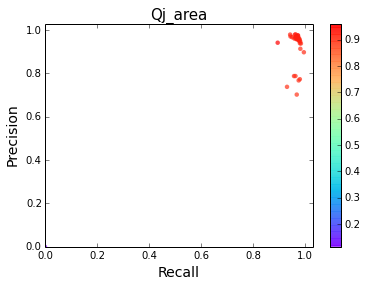

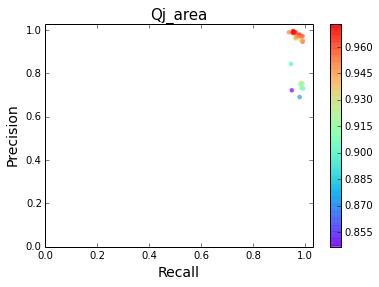

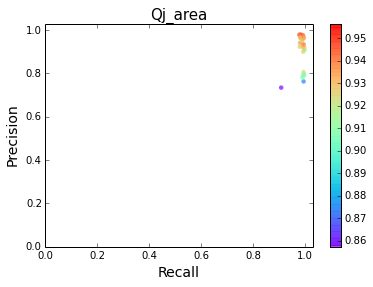

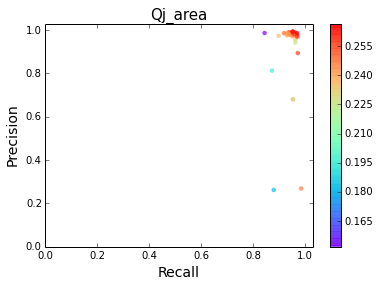

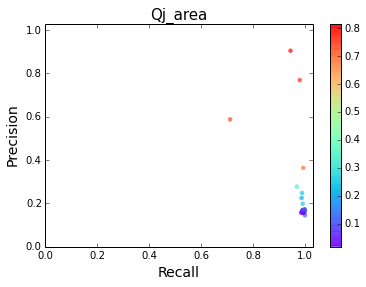

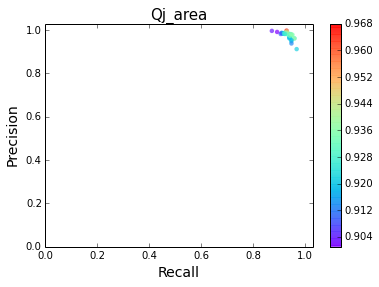

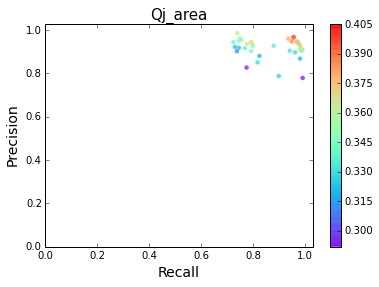

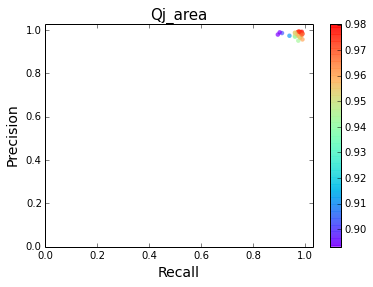

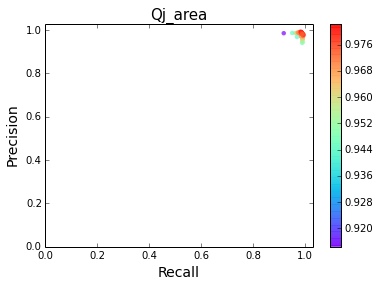

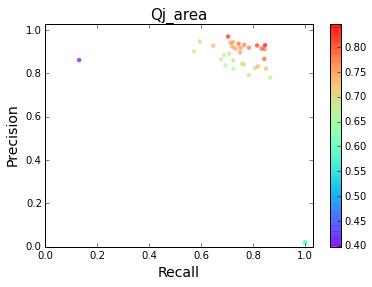

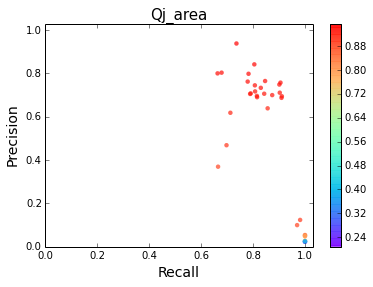

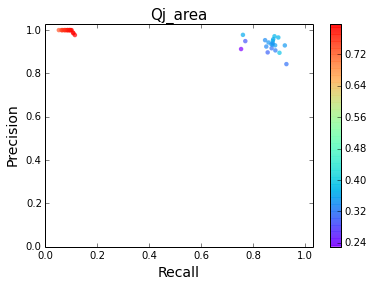

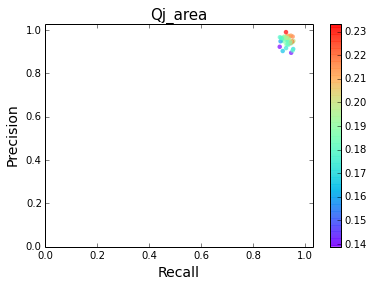

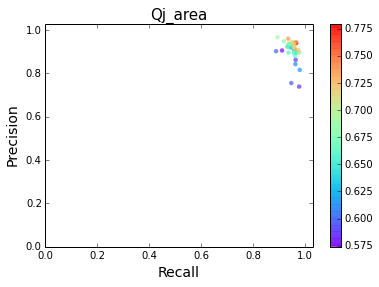

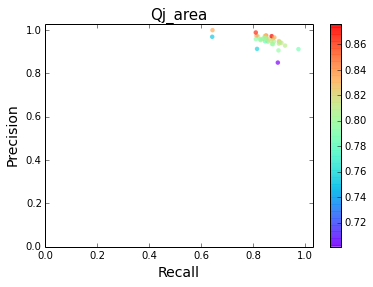

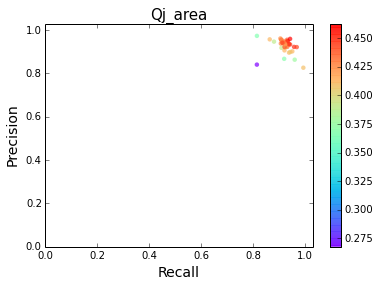

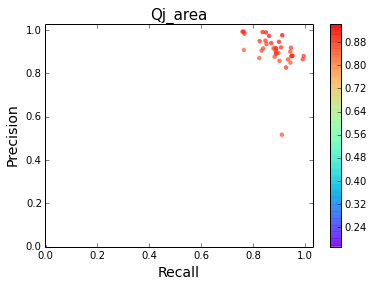

In [42]:
for objid in list(set(df.object_id)):
    df_obj = df[df["object_id"]==objid]
    scatterplot(df_obj,"Recall","Precision","Qj_area",bucketize=False)

The color ordering makes sense 

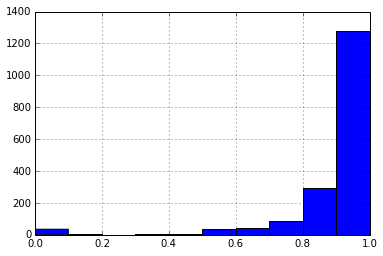

In [43]:
df["Recall"].hist()

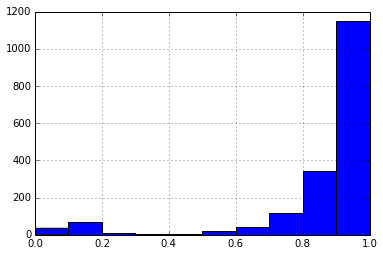

In [44]:
df["Precision"].hist()

In [45]:
df_filtered=df[(df["Precision"]>0.5)&(df["Recall"]>0.5)]

---------------------------------------------
Regression x=['Jaccard'];y=['Qj_area']
Coefficients:  [[ 0.49872115]]
Mean squared error: 0.08
R^2: 0.04


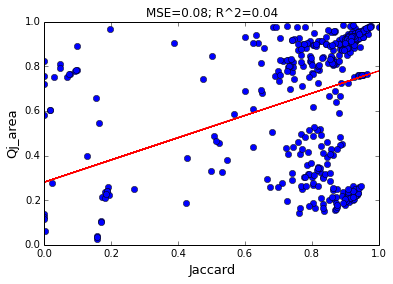

In [46]:
regression_results(df, ["Jaccard"],["Qj_area"],PLOT=True)

---------------------------------------------
Regression x=['Jaccard'];y=['Qj_area']
Coefficients:  [[ 0.51332564]]
Mean squared error: 0.07
R^2: 0.04


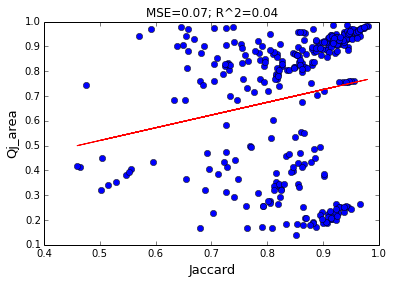

In [47]:
regression_results(df_filtered, ["Jaccard"],["Qj_area"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Qj_area']
Coefficients:  [[ 0.23010263]]
Mean squared error: 0.08
R^2: 0.03
---------------------------------------------
Regression x=['Recall'];y=['Qj_area']
Coefficients:  [[ 0.72967816]]
Mean squared error: 0.08
R^2: 0.03


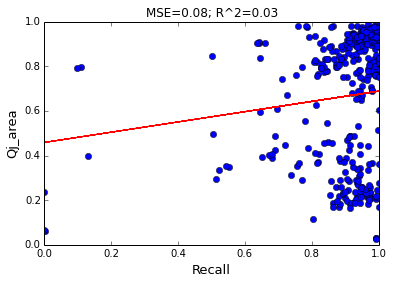

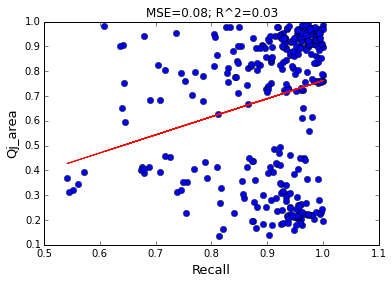

In [48]:
regression_results(df, ["Recall"],["Qj_area"],PLOT=True)
regression_results(df_filtered, ["Recall"],["Qj_area"],PLOT=True)

---------------------------------------------
Regression x=['Precision'];y=['Qj_area']
Coefficients:  [[ 0.43992943]]
Mean squared error: 0.07
R^2: 0.13
---------------------------------------------
Regression x=['Precision'];y=['Qj_area']
Coefficients:  [[ 0.29290471]]
Mean squared error: 0.08
R^2: -0.00


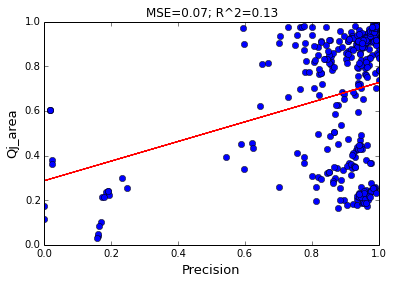

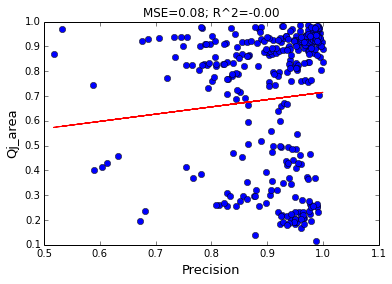

In [49]:
regression_results(df, ["Precision"],["Qj_area"],PLOT=True)
regression_results(df_filtered, ["Precision"],["Qj_area"],PLOT=True)

not well correlated 

# Correlation matrix

In [52]:
keys=["Qj_area",'Qn1[A>90%]', u'Qn2[A<90%]', u'Qp1[A>95%]', u'Qp2[A<95%]',
       u'Qn1[A>95%]', u'Qn2[A<95%]', u'Qp1[A>99%]', u'Qp2[A<99%]',
       u'Qn1[A>99%]', u'Qn2[A<99%]','Precision', 'Recall', 'Jaccard']

In [53]:
correlation = df[keys].corr('pearson')

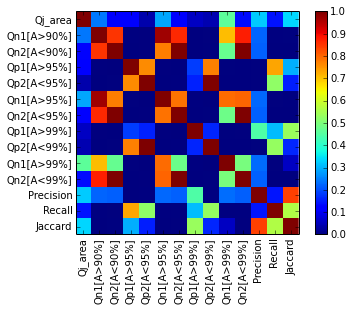

In [54]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, keys, rotation='vertical')
plt.yticks(ticks, keys, rotation='horizontal')
plt.colorbar()
plt.clim(0,1)

Qj is well correlated with Precision and Jaccard 

# P(T')

In [97]:
df = pd.read_csv("new_all_tile_combo_metric_snowball.csv",index_col=0)

In [62]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [63]:
df = df.drop("Average gamma value",axis=1)
df = df.drop("Total gamma value",axis=1)

In [64]:
# df["likelihoodGTLSA[Athres>1]"]=e**df["pTprimeGTLSA[Athres>1]"]
# df["likelihoodGTLSA[Athres>5]"]=e**df["pTprimeGTLSA[Athres>5]"]
# df["likelihoodGTLSA[Athres>10]"]=e**df["pTprimeGTLSA[Athres>10]"]

In [98]:
df = df.reindex_axis([u'objid', u'T prime', u'Total Votes', u'Average Votes', u'Total area',
       u'Average area', u'pTprimeGTLSA[Athres>1]', u'pTprimeGTLSA[Athres>5]',
       u'pTprimeGTLSA[Athres>10]',  u'AreaTprimeScore',
       u'pTprimeGTLSA[Athres>90%]', u'pTprimeGTLSA[Athres>95%]',
       u'pTprimeGTLSA[Athres>99%]',u'Precision', u'Recall'], axis=1)

In [100]:
# print df.keys()[9:][::-1]

In [110]:
# keys= df.keys()[9:][::-1]
keys = [ 'pTprimeGTLSA[Athres>1]', 'pTprimeGTLSA[Athres>5]','pTprimeGTLSA[Athres>10]','AreaTprimeScore','pTprimeGTLSA[Athres>90%]', u'pTprimeGTLSA[Athres>95%]','pTprimeGTLSA[Athres>99%]', 'Precision', 'Recall']
correlation = df[keys].corr('pearson')
correlation

,pTprimeGTLSA[Athres>1],pTprimeGTLSA[Athres>5],pTprimeGTLSA[Athres>10],AreaTprimeScore,pTprimeGTLSA[Athres>90%],pTprimeGTLSA[Athres>95%],pTprimeGTLSA[Athres>99%],Precision,Recall
pTprimeGTLSA[Athres>1],1.000000,0.982981,0.961488,-0.399261,0.996522,0.991794,0.969402,0.176381,-0.092128
pTprimeGTLSA[Athres>5],0.982981,1.000000,0.981905,-0.350832,0.982495,0.991505,0.985249,0.196219,-0.111389
pTprimeGTLSA[Athres>10],0.961488,0.981905,1.000000,-0.305933,0.971568,0.981663,0.983923,0.182837,-0.108273
AreaTprimeScore,-0.399261,-0.350832,-0.305933,1.000000,-0.378656,-0.363769,-0.339028,-0.195312,-0.179296
pTprimeGTLSA[Athres>90%],0.996522,0.982495,0.971568,-0.378656,1.000000,0.996649,0.975670,0.190389,-0.079350
pTprimeGTLSA[Athres>95%],0.991794,0.991505,0.981663,-0.363769,0.996649,1.000000,0.984363,0.192222,-0.095773
pTprimeGTLSA[Athres>99%],0.969402,0.985249,0.983923,-0.339028,0.975670,0.984363,1.000000,0.234736,-0.091381
Precision,0.176381,0.196219,0.182837,-0.195312,0.190389,0.192222,0.234736,1.000000,0.327667
Recall,-0.092128,-0.111389,-0.108273,-0.179296,-0.079350,-0.095773,-0.091381,0.327667,1.000000


~~This is very interesting, the area-weighted T' score seems to be strongly correlated with Recall~~

##### whereas p(T') done on area percentile threshold is strongly correlated with precision. '

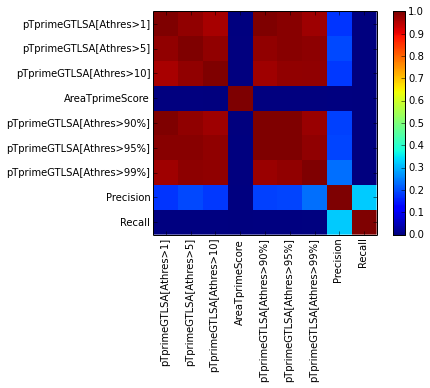

In [111]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, keys, rotation='vertical')
plt.yticks(ticks, keys, rotation='horizontal')
plt.colorbar()
plt.clim(0,1)

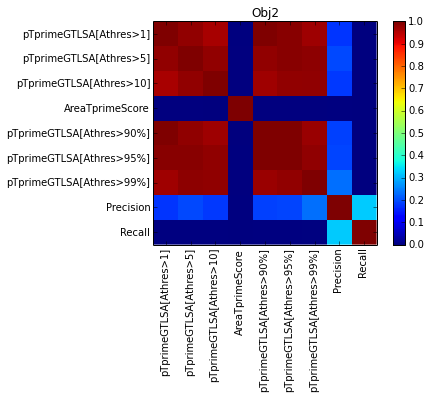

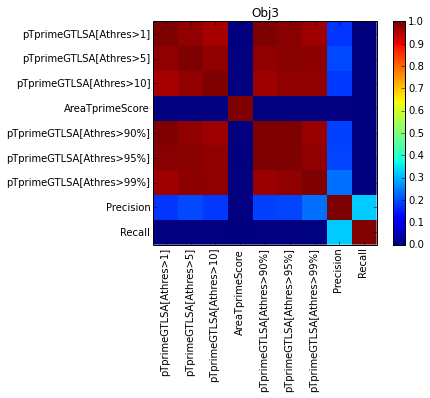

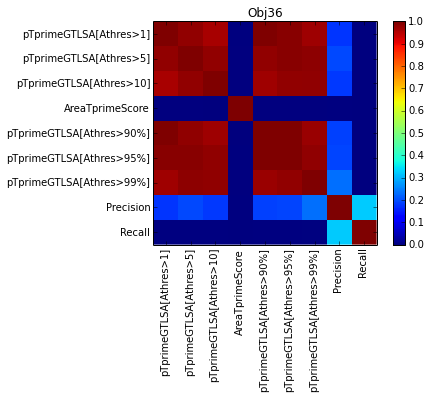

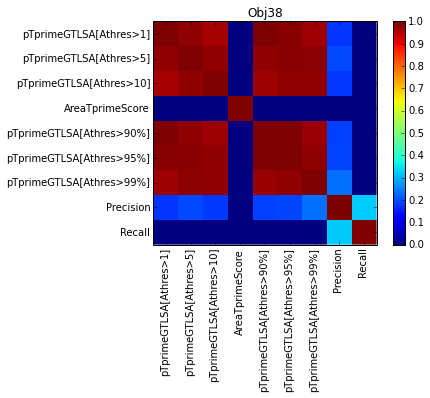

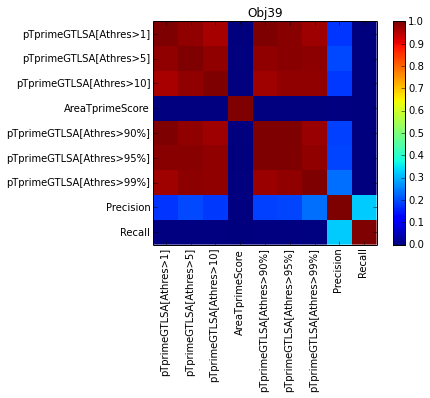

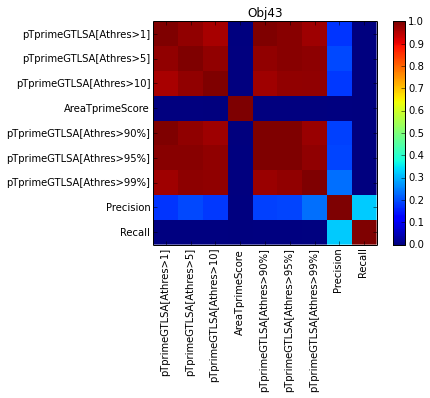

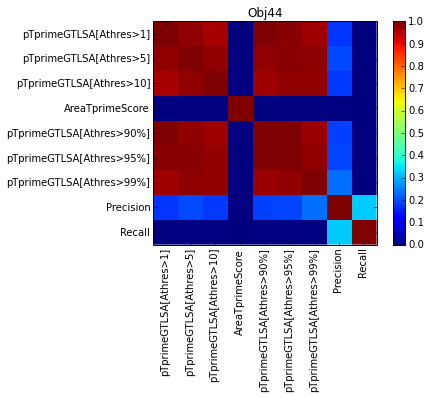

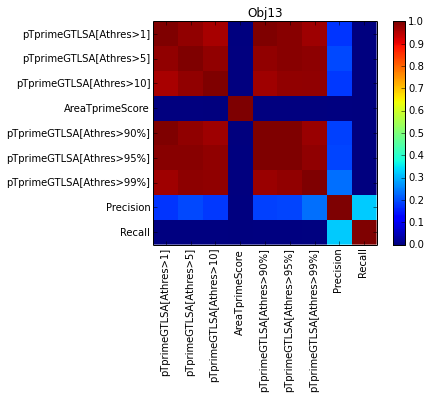

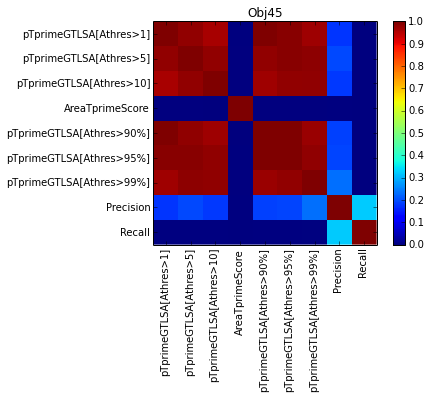

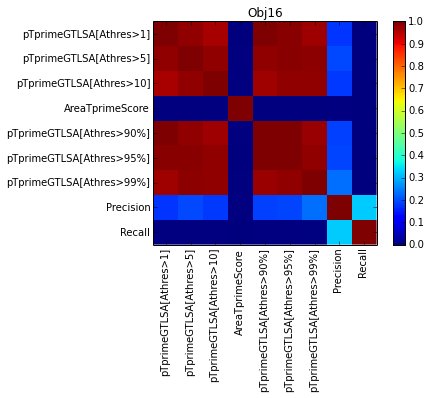

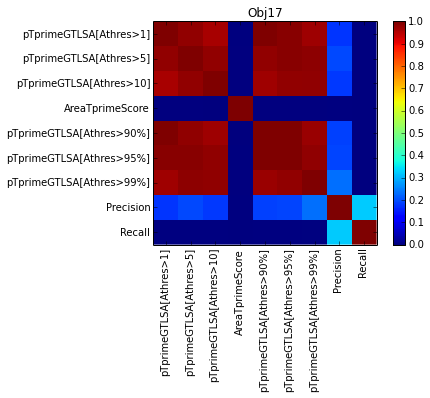

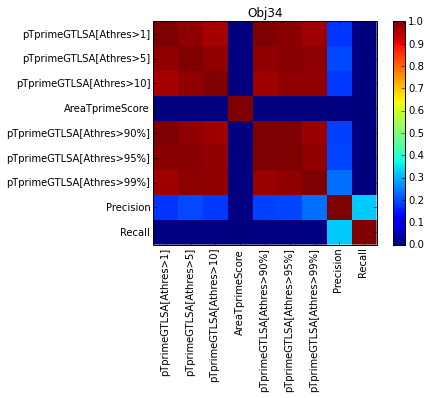

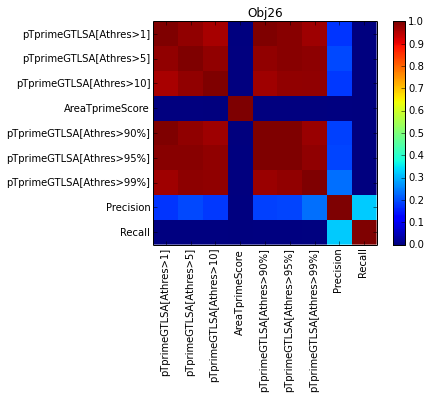

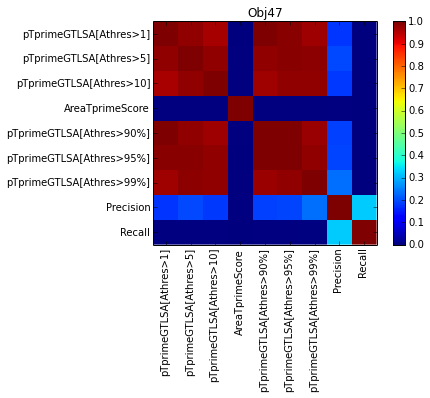

In [112]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    correlation = df[keys].corr('pearson')

    ticks=np.arange(0,shape(correlation)[0])
    plt.figure()
    plt.title("Obj{}".format(objid))
    plt.imshow(correlation.as_matrix(),interpolation="None")
    plt.xticks(ticks, keys, rotation='vertical')
    plt.yticks(ticks, keys, rotation='horizontal')
    plt.colorbar()
    plt.clim(0,1)

##### Qualitatively if we look at the table data, p(T') seems to be correlated with precision  in general

---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[ 0.00010366]]
Mean squared error: 0.00
R^2: 0.90
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[ 0.00015313]]
Mean squared error: 0.00
R^2: 0.81
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[  4.92486451e-05]]
Mean squared error: 0.00
R^2: 0.12
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[  1.37170484e-05]]
Mean squared error: 0.00
R^2: 0.69
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[ 0.00051713]]
Mean squared error: 0.02
R^2: 0.31
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[  2.89569385e-05]]


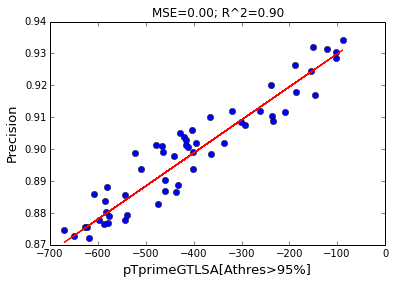

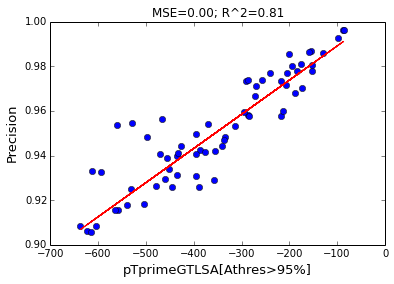

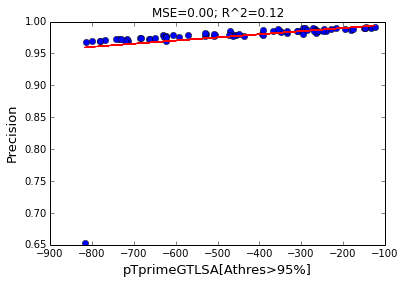

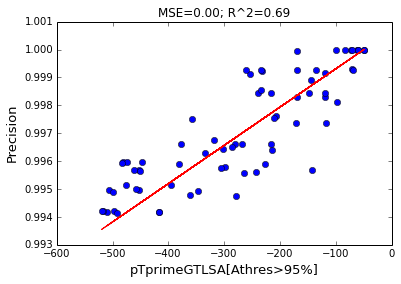

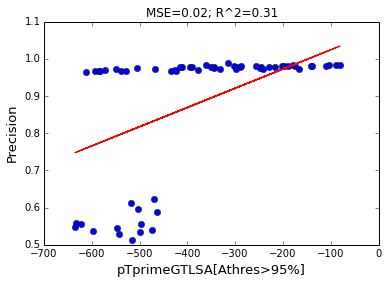

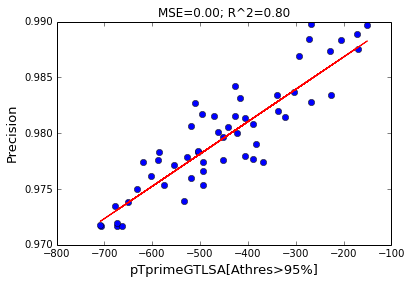

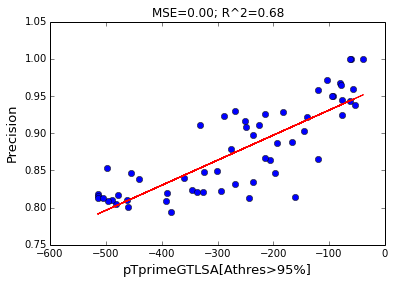

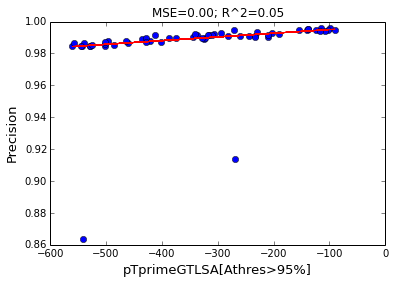

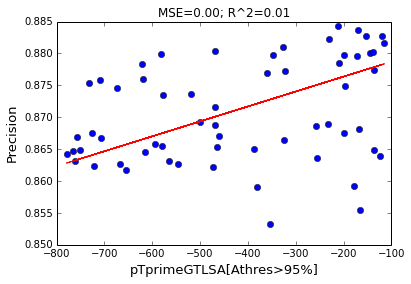

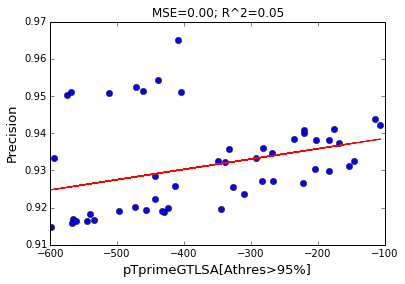

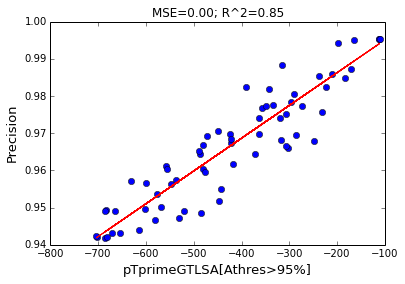

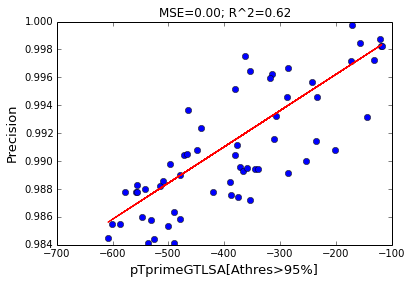

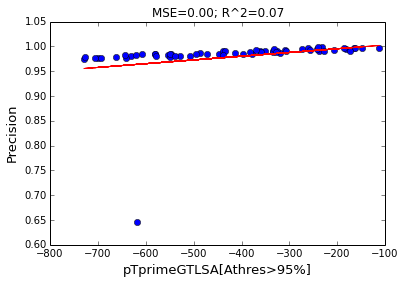

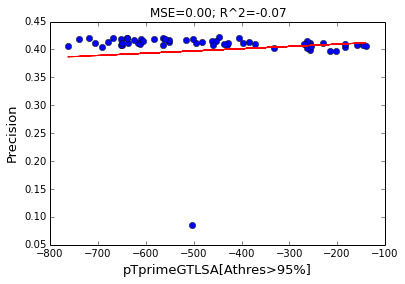

In [113]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    x_attr = ["pTprimeGTLSA[Athres>95%]"]
    y_attr = ["Precision"]
    regression_results(df_obj,x_attr,y_attr,PLOT=True)

area T prime score seems to be corelated with recall 

---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ 0.00017719]]
Mean squared error: 0.00
R^2: 0.46
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ 0.00010602]]
Mean squared error: 0.00
R^2: 0.70
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ -2.04653563e-05]]
Mean squared error: 0.00
R^2: -1.10
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[  4.31172004e-05]]
Mean squared error: 0.00
R^2: 0.75
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[-0.00075902]]
Mean squared error: 0.10
R^2: 0.24
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ 0.00017795]]
Mean squared error: 0.00
R^2: 0.88
-----------------------------------------

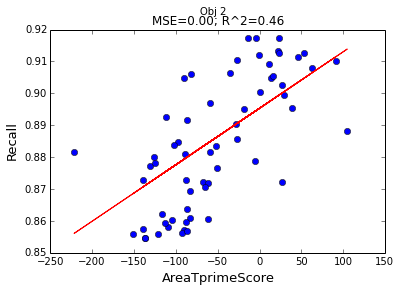

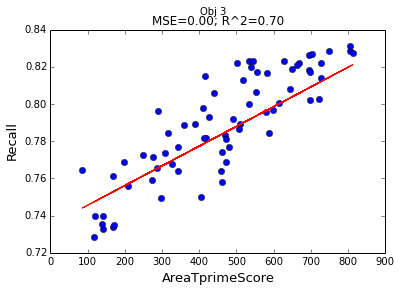

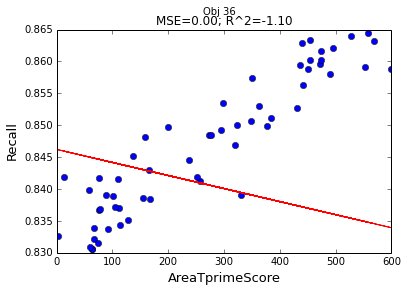

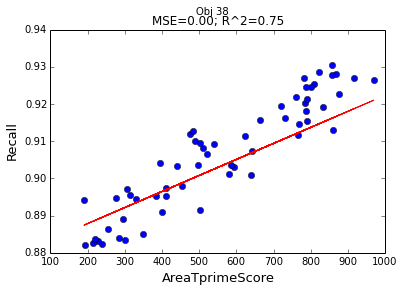

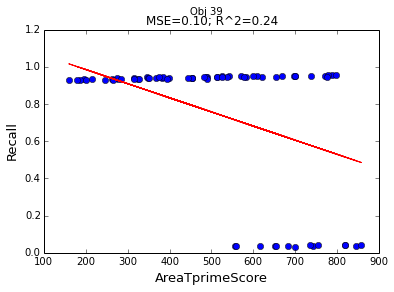

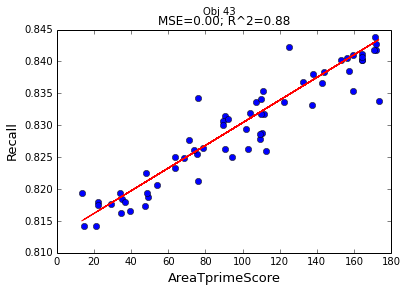

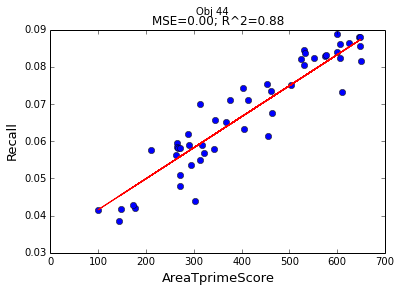

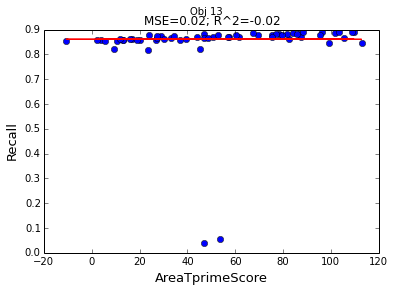

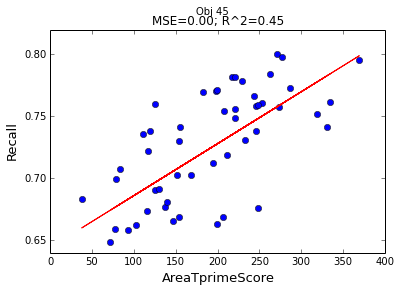

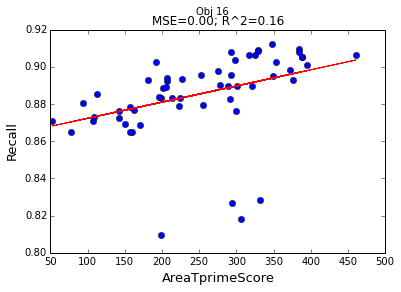

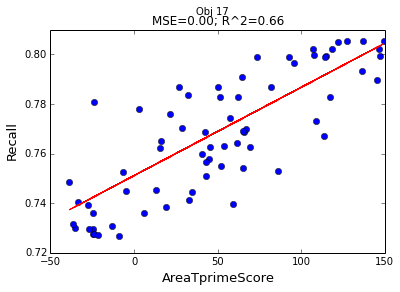

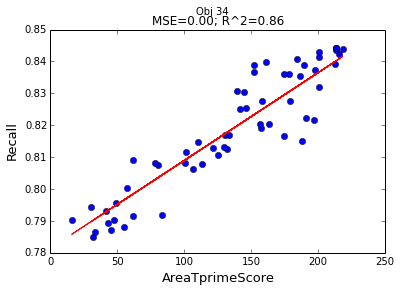

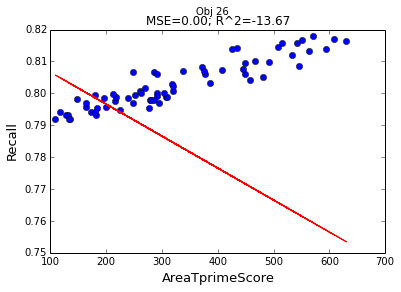

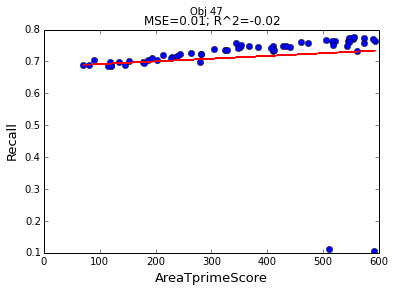

In [114]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    x_attr = ["AreaTprimeScore"]
    y_attr = ["Recall"]

    regression_results(df_obj,x_attr,y_attr,PLOT=True)
    plt.suptitle("Obj {}".format(objid))

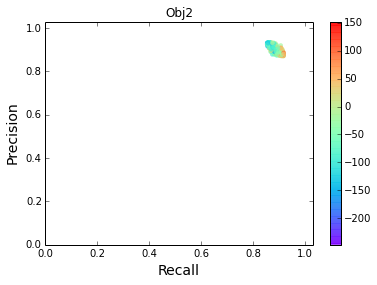

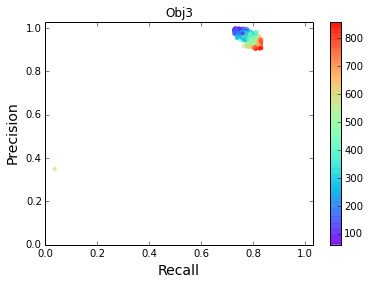

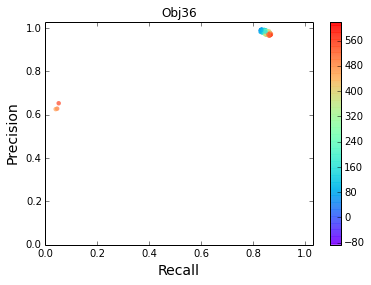

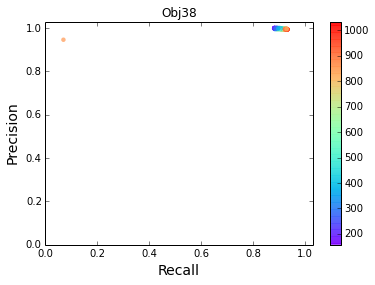

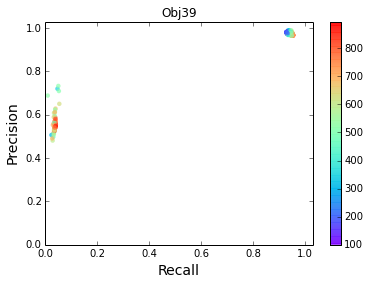

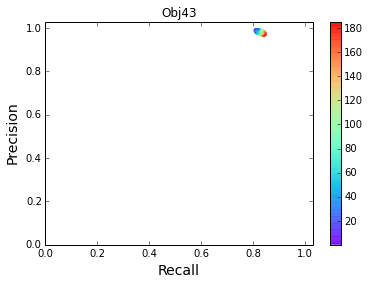

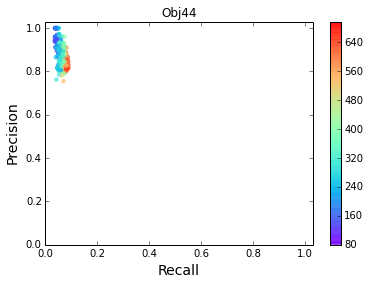

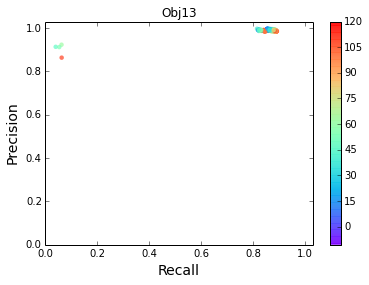

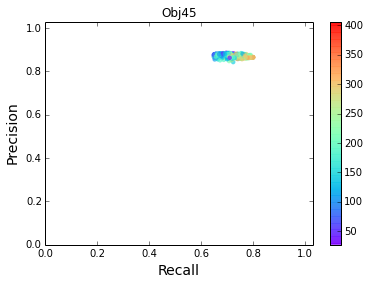

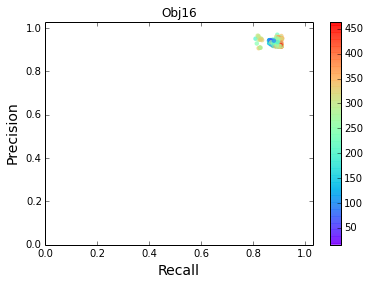

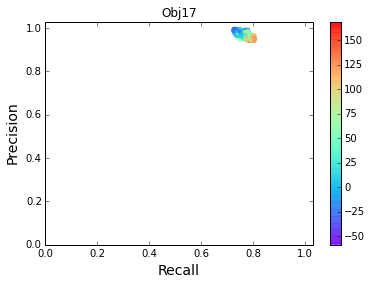

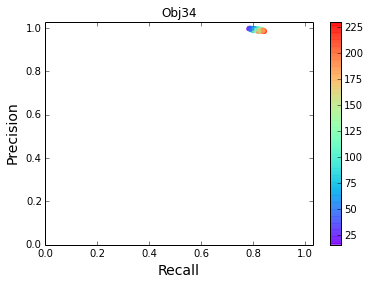

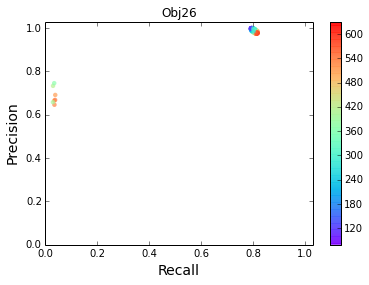

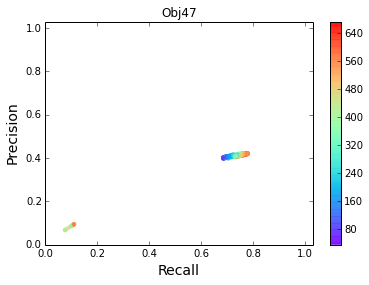

In [118]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    scatterplot(df_obj,"Recall","Precision","AreaTprimeScore",bucketize=False)
    plt.title("Obj{}".format(objid))

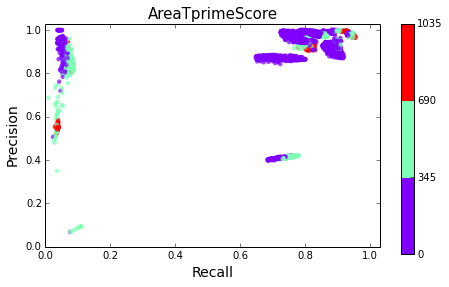

In [106]:
z_attr="AreaTprimeScore"
bucketized_data = bucketize(abs(df[z_attr]),3)
scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

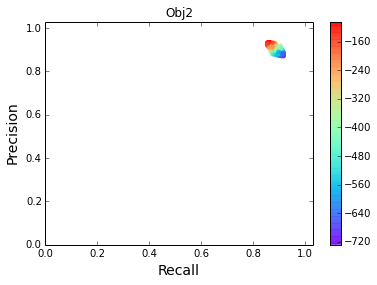

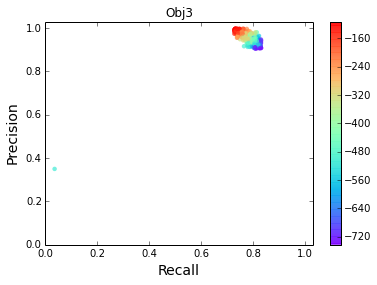

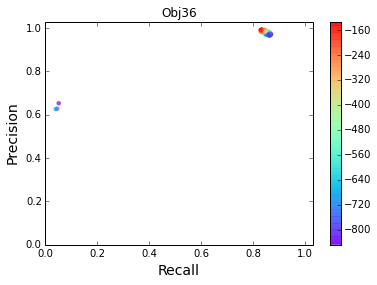

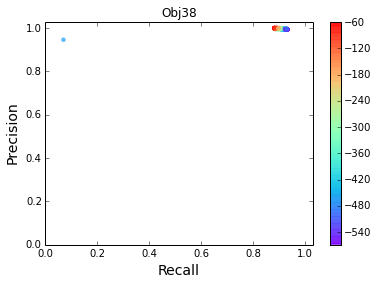

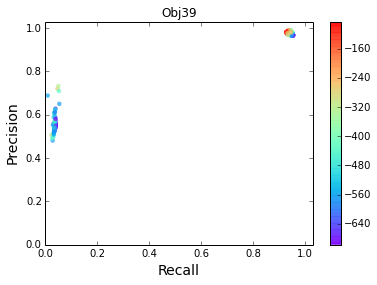

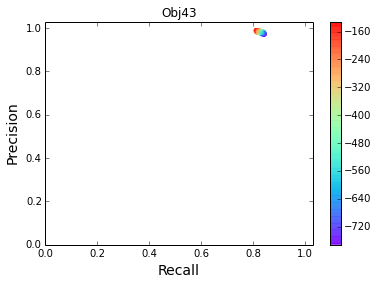

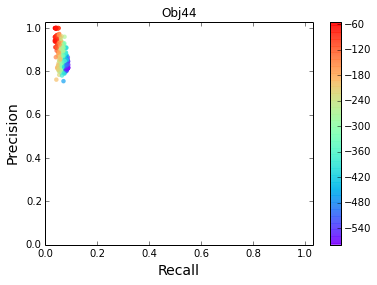

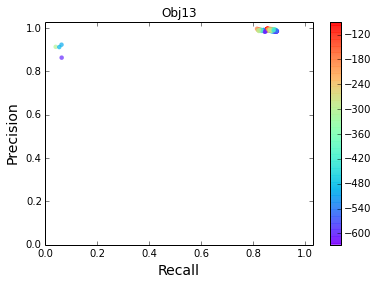

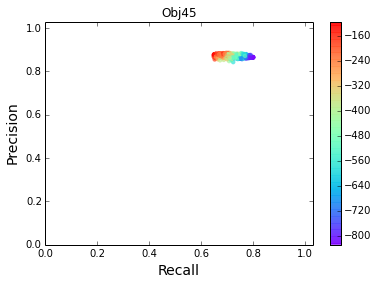

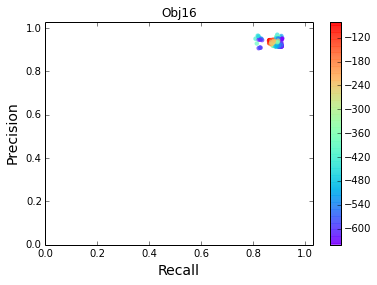

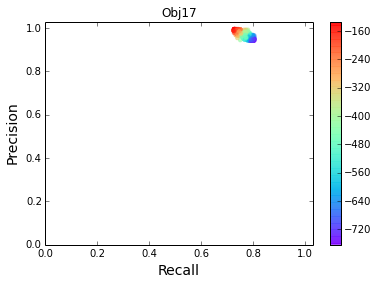

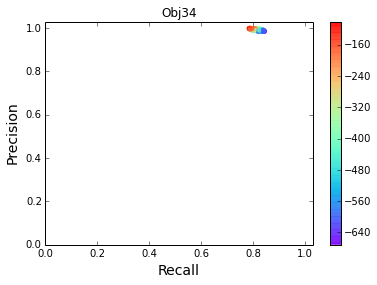

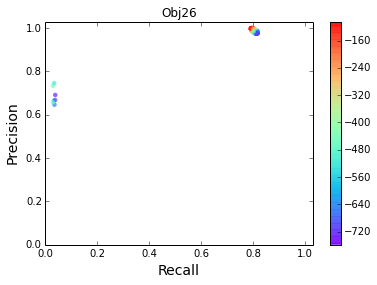

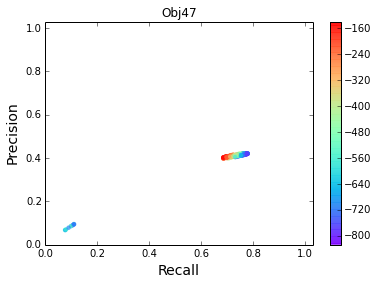

In [120]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    scatterplot(df_obj,"Recall","Precision","pTprimeGTLSA[Athres>90%]",bucketize=False)
    plt.title("Obj{}".format(objid))


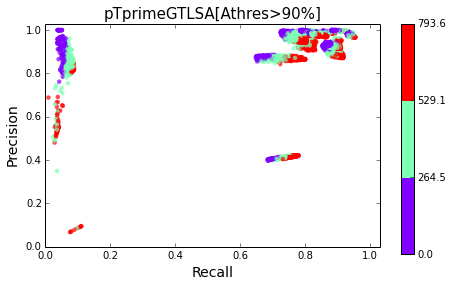

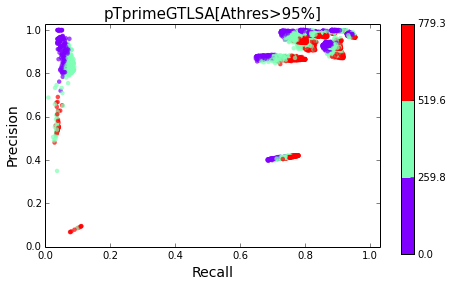

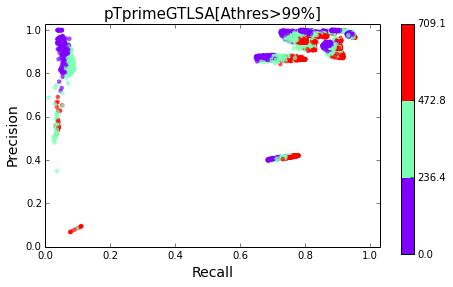

In [116]:
for thres in [90,95,99]:
    z_attr="pTprimeGTLSA[Athres>{}%]".format(thres)
    bucketized_data = bucketize(abs(df[z_attr]),3)
    scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)